In [22]:
import numpy as np 
import pandas as pd 

In [21]:
train = pd.read_csv ('./data/titanic_clean.csv')

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Embarked_num,E_C,E_Q,E_S
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,1,2,0,0,1
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,2,0,0,1
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,0,0,1
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,1,2,0,0,1


In [6]:
train.info() # object는 문자열 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    float64
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         891 non-null    object 
 11  Embarked      891 non-null    object 
 12  Sex_num       891 non-null    int64  
 13  Embarked_num  891 non-null    int64  
 14  E_C           891 non-null    int64  
 15  E_Q           891 non-null    int64  
 16  E_S           891 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 118.5+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_num,Embarked_num,E_C,E_Q,E_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.305776,29.699118,0.523008,0.381594,32.204208,0.647587,1.536476,0.188552,0.086420,0.725028
std,257.353842,0.486592,0.832919,13.002015,1.102743,0.806057,49.693429,0.477990,0.791503,0.391372,0.281141,0.446751
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,1.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,2.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,2.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,2.000000,1.000000,1.000000,1.000000


In [8]:
#Pclass 정수로 type 변환 astype은 column의 type을 바꿔준다. 
train['Pclass'] = train['Pclass'].astype(int) 
train['Age'] = train['Age'].astype(int)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd

In [26]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_num',
       'Embarked_num', 'E_C', 'E_Q', 'E_S'],
      dtype='object')

In [27]:
 df_eda = train.loc[:, 'PassengerId':'Embarked']

In [28]:
# 데이터 프레임간의 상관관계를 살펴봄
df_eda.corr()['PassengerId':'Fare']

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.030049,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.336197,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.030049,-0.336197,1.000000,-0.332594,0.082482,0.021167,-0.549410
Age,0.033207,-0.069809,-0.332594,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.082482,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.021167,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549410,0.091566,0.159651,0.216225,1.000000


<AxesSubplot:>

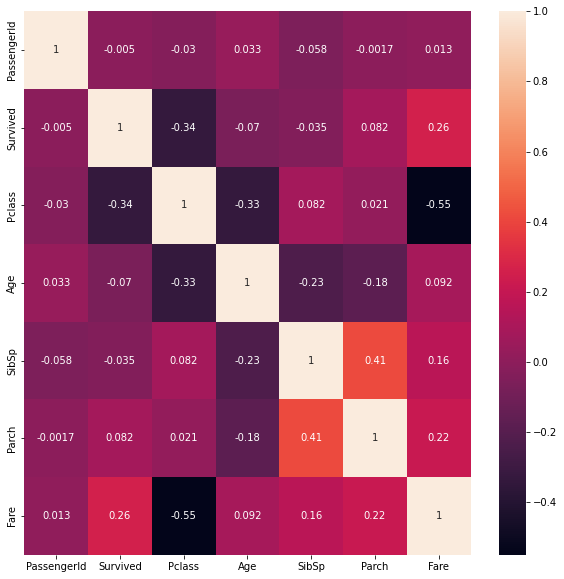

In [30]:
fig = plt.figure(figsize = (10,10))
sns.heatmap(df_eda.corr(), annot= True)

<AxesSubplot:>

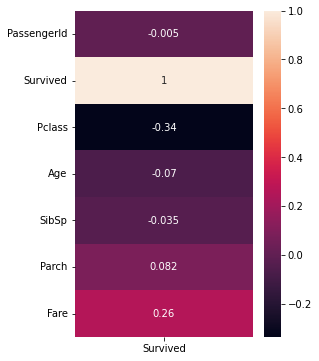

In [31]:
fig = plt.figure(figsize =(4,6))
sns.heatmap(df_eda.corr()[['Survived']], annot =True)

In [32]:
df_eda['Pclass'].value_counts()

3.000000    485
1.000000    215
2.000000    183
2.305776      8
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

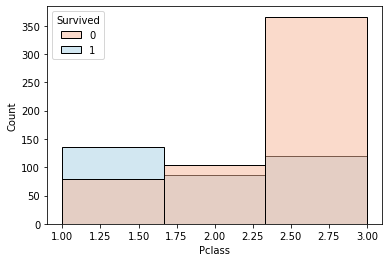

In [33]:
sns.histplot(x = 'Pclass', data = df_eda, hue = 'Survived', palette ='RdBu', bins =3 )

<AxesSubplot:xlabel='Sex', ylabel='Count'>

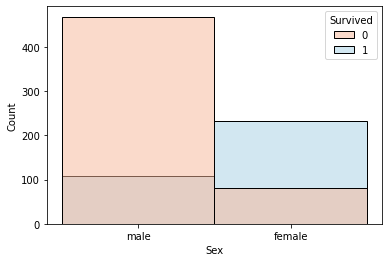

In [34]:
sns.histplot(x = 'Sex', data = df_eda, hue = 'Survived', palette ='RdBu', bins =2 )

<AxesSubplot:xlabel='Age', ylabel='Count'>

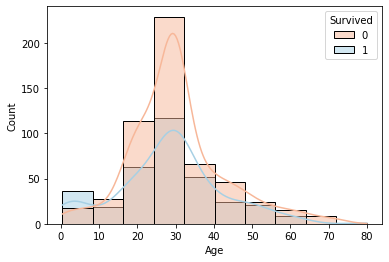

In [37]:
sns.histplot(x = 'Age', data = df_eda, hue = 'Survived', palette ='RdBu', bins =10, kde = True)

In [38]:
df_eda['Embarked'].value_counts()


S    646
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

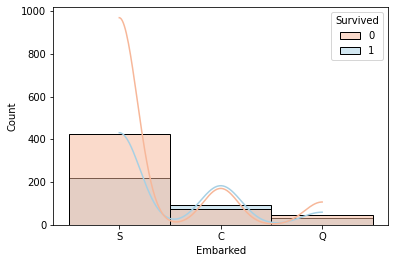

In [42]:
sns.histplot(x = 'Embarked', data = df_eda, hue = 'Survived', palette ='RdBu', bins = 10 , kde = True)

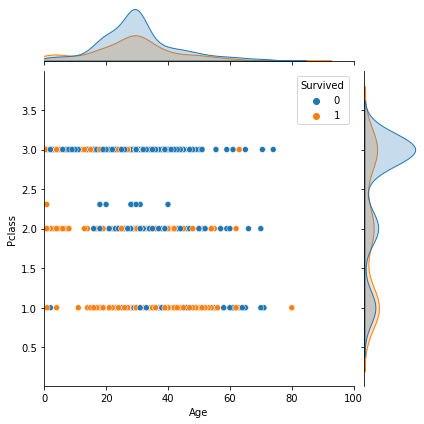

In [50]:
sns.jointplot(x = 'Age', y = 'Pclass', data = df_eda, hue = 'Survived', xlim = (0,100))

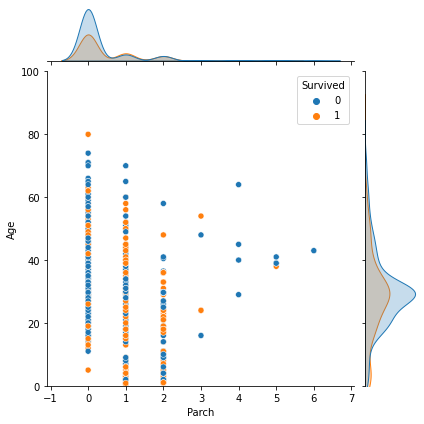

In [45]:
sns.jointplot(x = 'Parch', y = 'Age', data = df_eda, hue = 'Survived', ylim = (0,100))

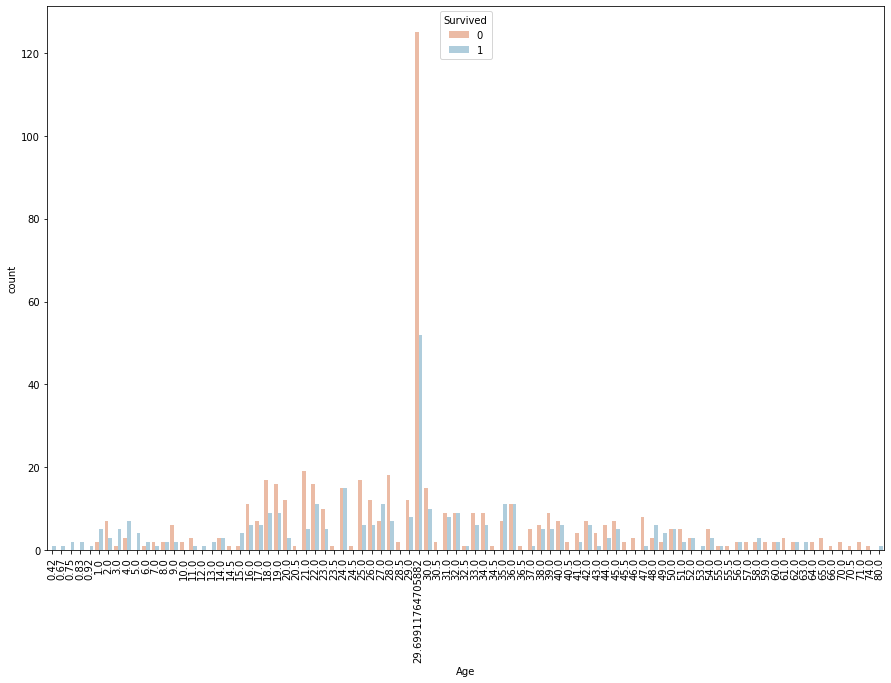

In [46]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 90)
sns.countplot(x = 'Age', data = df_eda, hue= 'Survived', palette = 'RdBu')
plt.show()

In [47]:
df_eda['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

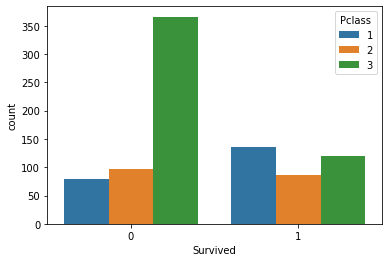

In [48]:
sns.countplot(x = 'Survived', data = df_eda, hue = 'Pclass', hue_order = [1,2,3])

<AxesSubplot:xlabel='Survived', ylabel='count'>

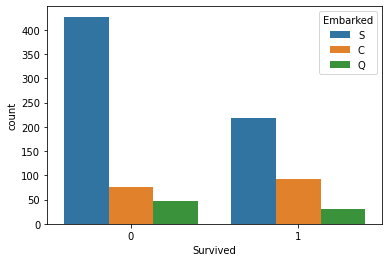

In [51]:
sns.countplot(x = 'Survived', data = df_eda, hue = 'Embarked', hue_order = ['S','C','Q'])

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Embarked_num,E_C,E_Q,E_S
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,1,2,0,0,1
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,2,0,0,1
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,0,0,1
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,1,2,0,0,1


In [54]:
feature = ['Pclass', 'Sex_num', 'Age', 'Fare', 'E_C', 'E_Q', 'E_S']
X = train[feature]
X

,Pclass,Sex_num,Age,Fare,E_C,E_Q,E_S
0,3.0,1,22.000000,7.2500,0,0,1
1,1.0,0,38.000000,71.2833,1,0,0
2,3.0,0,26.000000,7.9250,0,0,1
3,1.0,0,35.000000,53.1000,0,0,1
4,3.0,1,35.000000,8.0500,0,0,1
...,...,...,...,...,...,...,...
886,2.0,1,27.000000,13.0000,0,0,1
887,1.0,0,19.000000,30.0000,0,0,1
888,3.0,0,29.699118,23.4500,0,0,1
889,1.0,1,26.000000,30.0000,1,0,0


In [55]:
label = 'Survived'
y = train[label]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [56]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Embarked_num,E_C,E_Q,E_S
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,1,2,0,0,1
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,2,0,0,1
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,0,0,1
4,5,0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,1,2,0,0,1


In [57]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [61]:
X_test.shape, y_test.shape

((223, 7), (223,))

In [63]:
X_train.shape, y_train.shape

((668, 7), (668,))

In [64]:
from sklearn.linear_model import SGDClassifier

In [65]:
model1 = SGDClassifier(random_state =0)

In [66]:
model1

SGDClassifier(random_state=0)

In [68]:
model1.fit(X_train, y_train)

SGDClassifier(random_state=0)

In [73]:
pred = model1.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [74]:
y_test

590    0
131    0
628    0
195    1
230    1
      ..
12     0
203    0
84     1
886    0
759    1
Name: Survived, Length: 223, dtype: int64

In [100]:
(pred == y_test).mean()

0.6681614349775785

In [94]:
from sklearn.metrics import classification_report

In [95]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       147
           1       1.00      0.03      0.05        76

    accuracy                           0.67       223
   macro avg       0.83      0.51      0.43       223
weighted avg       0.78      0.67      0.54       223



In [101]:
model1.classes_

array([0, 1])

In [102]:
model1.coef_.shape

(1, 7)

In [125]:
model1.coef_

array([[-5.53407710e+01, -5.67321827e+02, -2.71426696e-01,
        -8.67675723e+00,  1.02901944e+02,  7.29569336e+01,
        -7.73125715e+01]])

In [128]:
model1.coef_[0,2:]

array([ -0.2714267 ,  -8.67675723, 102.9019437 ,  72.95693363,
       -77.31257146])

In [115]:
fig = plt.figure(figsize=(15,8))
fig

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

In [ ]:
plt.bar(X.columns, model1.coef_[0,:])

In [ ]:
plt.xticks(rotation=90)

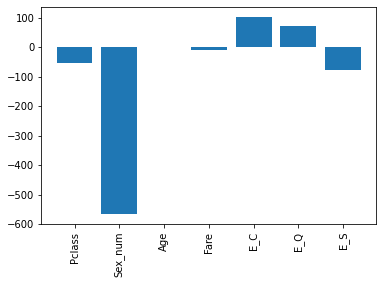

In [121]:
plt.show()

In [105]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [108]:
dt_clf = DecisionTreeClassifier()

In [109]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [110]:
y_pred = dt_clf.predict(X_test)

In [111]:
print('예측 정확도: %.2f' % accuracy_score(y_test, y_pred))

예측 정확도: 0.80


In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       147
           1       0.71      0.70      0.70        76

    accuracy                           0.80       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.80      0.80      0.80       223

